# Problem 2
Included with the assignment are several files (stxxxxts).  These files track the historical population of US states by year for 1900-1990.  Write a script to process these data and load them into a data structure you can work with. What problems did you have to deal with when working with these files?
Plot the populations of Alaska and California over time.  Plot the population of New England and the Southwest over time. Don’t forget to label your axes.
What state showed the greatest change in population? Note that there is more than one way to quantify this - provide at least two (meaningful) ways in your iPython Notebook.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline
problem2data_location='./Problem2Data'
!cd problem2data_location
!ls

/bin/sh: line 0: cd: problem2data_location: No such file or directory
Problem1.ipynb   dtree2.pdf       problem3.ipynb   tree.png
Problem_4.ipynb  dtree2.png       problem3_2.ipynb workfile.dot
Untitled.ipynb   problem2.ipynb   tree.dot         workfile.png


In [3]:
%cd '/Users/ryanriopelle/Documents/DSE/DSE220/Assignments/Lab 1'
!ls

/Users/ryanriopelle/Documents/DSE/DSE220/Assignments/Lab 1
AHW_1.csv                           st1019ts.txt
AHW_with_HWbmi_cycbaskten2.csv      st2029ts.txt
DSiP-3-Numpy_Weather_Data_Set.ipynb st3039ts.txt
Index of wine                       st4049ts.txt
Lab1_mysolutions                    st5060ts.txt
MAS_DSE_220_Assignment_1_2016.docx  st6070ts.txt
POLIO_Cases_1928-1969.csv           st7080ts.txt
WineDataSet                         st8090ts.txt
iris.dot                            tree.dot
st0009ts.txt                        wine.names


Notes on the method parsing each one

st0009ts.txt - This file is blank
st1019ts.txt - So far having some issues, not the same as the next 4
st2029ts.txt - Finished, just need to fix Nrotheast line
st3039ts.txt - 
st4049ts.txt -
st5060ts.txt - 
st6070ts.txt -
st7080ts.txt -
st8090ts.txt - 

In [4]:
#Set up loop to run over all of the files

file_names=['st0009ts.txt', 'st1019ts.txt', 'st2029ts.txt', 'st3039ts.txt', 'st4049ts.txt', 'st5060ts.txt', 'st6070ts.txt', 'st7080ts.txt', 'st8090ts.txt']
for file_name in file_names:
    print file_name

st0009ts.txt
st1019ts.txt
st2029ts.txt
st3039ts.txt
st4049ts.txt
st5060ts.txt
st6070ts.txt
st7080ts.txt
st8090ts.txt


In [5]:
# st0009ts.txt
# Extracts column info from top of the page and sets to variable 

col_names=['State']+(open('st0009ts.txt').readlines()[15].split())+['NA']
print col_names

#puts the dataframe in to a pnadas data strcture 
new_file=open('st0009ts.txt').readlines()[17:72]
new_file
d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st0009 = pd.DataFrame(d_list, columns=col_names) 

##This fixes row number two where the column ordering was off, ande deletes last row (no longer needed)
st0009.iloc[2,0]='Northcentral'
for i in range(1,len(st0009.columns)-1):
    st0009.iloc[2,i]=st0009.iloc[2,i+1]
del st0009['NA']

st0009.head()

['State', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', 'NA']


,State,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909
0,U.S.,"76,094","77,585","79,160","80,632","82,165","83,820","5,437","87,000","88,709","90,492"
1,Northeast,"21,059","21,401","21,815","22,248","22,716","23,214","3,769","24,320","24,879","25,440"
2,Northcentral,"26,359","26,722","27,126","27,446","27,830","28,203","8,524","28,868","29,187","29,530"
3,South,"24,565","25,114","25,599","26,055","26,492","27,003","7,475","27,879","28,406","28,963"
4,West,"4,112","4,351","4,620","4,882","5,127","5,398","5,671","5,934","6,234","6,557"


In [6]:
# 'st1019ts.txt'
# Extracts column info from top of the page and sets to variable 

col_names=['State']+(open('st1019ts.txt').readlines()[15].split())+['NA']
print col_names

#puts the dataframe in to a pnadas data strcture 
new_file=open('st1019ts.txt').readlines()[17:72]
new_file
d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st1019 = pd.DataFrame(d_list, columns=col_names) 

##This fixes row number two where the column ordering was off, ande deletes last row (no longer needed)
st1019.iloc[2,0]='Northcentral'
for i in range(1,len(st1019.columns)-1):
    st1019.iloc[2,i]=st1019.iloc[2,i+1]
del st1019['NA']

st1019.head()

['State', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', 'NA']


,State,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,U.S.,"92,407","93,868","95,331","97,227","99,118","100,549","101,966","103,266","103,203","104,512"
1,Northeast,"25,958","26,338","26,746","27,224","27,684","28,049","28,427","28,814","28,683","29,335"
2,Northcentral,"30,019","30,385","30,778","31,327","31,914","32,432","32,912","33,245","33,966","33,568"
3,South,"29,544","30,025","30,457","31,066","31,670","32,051","32,433","32,776","32,975","32,860"
4,West,"6,885","7,118","7,351","7,610","7,852","8,016","8,194","8,432","8,575","8,747"


In [7]:
#'st2029ts.txt'
# Extracts column info from top of the page and sets to variable 

col_names=['State']+(open('st2029ts.txt').readlines()[15].split())+['NA']
print col_names

#puts the dataframe in to a pnadas data strcture 
new_file=open('st2029ts.txt').readlines()[17:72]
new_file
d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st2029 = pd.DataFrame(d_list, columns=col_names) 

##This fixes row number two where the column ordering was off, ande deletes last row (no longer needed)
st2029.iloc[2,0]='Northcentral'
for i in range(1,len(st2029.columns)-1):
    st2029.iloc[2,i]=st2029.iloc[2,i+1]
del st2029['NA']

st2029.head()

['State', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', 'NA']


,State,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929
0,U.S.,"106,466","108,541","110,055","111,950","114,113","115,832","11,7399","119,038","120,501","121,770"
1,Northeast,"29,674","30,187","30,619","31,128","31,761","32,274","32,627","32,886","33,464","34,013"
2,Northcentral,"34,373","35,005","35,414","35,971","36,571","37,039","37,461","37,937","38,198","38,447"
3,South,"33,357","33,947","34,366","34,837","35,383","35,842","36,374","36,972","37,352","37,626"
4,West,"9,059","9,401","9,655","10,014","10,402","10,674","10,942","11,243","11,486","11,683"


In [8]:
#'st3039ts.txt'
# Extracts column info from top of the page and sets to variable 

col_names=['State']+(open('st3039ts.txt').readlines()[15].split())+['NA']
print col_names

#puts the dataframe in to a pnadas data strcture 
new_file=open('st3039ts.txt').readlines()[17:72]
new_file
d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st3039 = pd.DataFrame(d_list, columns=col_names) 

##This fixes row number two where the column ordering was off, ande deletes last row (no longer needed)
st3039.iloc[2,0]='Northcentral'
for i in range(1,len(st3039.columns)-1):
    st3039.iloc[2,i]=st3039.iloc[2,i+1]
del st3039['NA']

st3039.head()

['State', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', 'NA']


,State,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939
0,U.S.,"123,077","124,040","124,840","125,579","126,374","127,250","128,053","128,825","129,825","130,880"
1,Northeast,"34,539","34,868","35,105","35,271","35,433","35,595","35,723","35,798","35,991","35,991"
2,Northcentral,"38,667","38,872","39,053","39,199","39,287","39,454","39,561","39,640","39,735","39,961"
3,South,"37,920","38,176","38,456","38,780","39,162","39,516","39,812","40,131","40,636","41,250"
4,West,"11,949","12,122","12,225","12,330","12,490","12,686","12,958","13,253","13,463","13,682"


In [9]:
# 'st4049ts.txt'
# Extracts column info from top of the page and sets to variable 

col_names=['State']+(open('st4049ts.txt').readlines()[13].split())+['NA']
print col_names

#puts the dataframe in to a pnadas data strcture 
new_file=open('st4049ts.txt').readlines()[15:70]
new_file
d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st4049 = pd.DataFrame(d_list, columns=col_names) 

##This fixes row number two where the column ordering was off, ande deletes last row (no longer needed)
st4049.iloc[0,0]='Northcentral'
for i in range(1,len(st4049.columns)-1):
    st4049.iloc[0,i]=st4049.iloc[0,i+1]
del st4049['NA']

st4049

['State', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', 'NA']


,State,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949
0,Northcentral,"133,121","133,920","134,245","132,885","132,481","140,054","143,446","146,093","148,665",None
1,Northeast,"35,975","35,987","35,575","34,881","34,335","34,067","36,594","37,835","38,790","39,551"
2,North,Central,"40,223","40,334","40,236","39,284","39,006","38,807","41,576","42,597","43,437"
3,South,"41,825","42,623","43,269","43,933","43,002","42,594","44,261","45,041","45,414","45,981"
4,West,"13,931","14,178","14,840","16,147","16,543","17,012","17,623","17,973","18,452","18,958"
5,None,None,None,None,None,None,None,None,None,None,None
6,AL,"2,845","2,902","2,941","2,902","2,802","2,775","2,911","2,942","2,969","3,000"
7,AZ,499,490,524,692,610,594,616,653,690,714
8,AR,"1,955","1,969","1,977","1,843","1,768","1,762","1,797","1,836","1,825","1,844"
9,CA,"6,950","7,237","7,735","8,506","8,945","9,344","9,559","9,832","10,064","10,337"


In [10]:
# 'st5060ts.txt'
# Extracts column info from top of the page and sets to variable 

col_names=open('st5060ts.txt').readlines()[16].split()#+['NA']
col_names[0]='State'
col_names.insert(1, "Census")
print col_names

#puts the dataframe in to a panadas data strcture 
new_file=open('st5060ts.txt').readlines()[28:78]
new_file

d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st5060 = pd.DataFrame(d_list, columns=col_names) 

##This fixes row number two where the column ordering was off, ande deletes last row (no longer needed)
st5060.iloc[5,0]='Northcentral'
for i in range(1,len(st5060.columns)-1):
    st5060.iloc[5,i]=st5060.iloc[5,i+1]

#del st5060['NA']
del st5060['(census)']
st5060

['State', 'Census', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '(census)']


,State,Census,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959
0,AK,129,135,158,189,205,215,222,224,231,224,224
1,AZ,750,756,785,842,894,933,987,"1,053","1,125","1,193","1,261"
2,AR,"1,910","1,908","1,901","1,838","1,780","1,734","1,725","1,704","1,733","1,726","1,756"
3,CA,"10,586","10,677","11,134","11,635","12,251","12,746","13,133","13,713","14,264","14,880","15,467"
4,CO,"1,325","1,325","1,326","1,365","1,431","1,493","1,546","1,625","1,664","1,667","1,710"
5,Northcentral,"2,016","2,028","2,081","2,168","2,249","2,300","2,316","2,359","2,446","2,523","2,535"
6,DE,318,321,331,341,351,368,389,408,426,433,441
7,DC,802,806,808,805,810,791,785,759,763,757,761
8,FL,"2,771","2,810","2,980","3,157","3,310","3,505","3,747","4,047","4,372","4,630","4,808"
9,GA,"3,445","3,458","3,531","3,584","3,558","3,602","3,636","3,701","3,766","3,804","3,868"


In [11]:
# 'st6070ts.txt'
# Extracts column info from top of the page and sets to variable 

col_names=open('st6070ts.txt').readlines()[16].split()
col_names[0]='State'
col_names.insert(1, "Census")
print col_names

#puts the dataframe in to a panadas data strcture 
new_file=open('st6070ts.txt').readlines()[25:75]
new_file

d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st6070 = pd.DataFrame(d_list, columns=col_names) 

##This fixes row number two where the column ordering was off, ande deletes last row (no longer needed)
st6070.iloc[5,0]='Northcentral'
for i in range(1,len(st6070.columns)-1):
    st6070.iloc[5,i]=st6070.iloc[5,i+1]

#del st6070['NA']
del st6070['Census']
st6070

['State', 'Census', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970']


,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970
0,AK,229,238,246,256,263,271,271,278,285,296,302
1,AZ,"1,321","1,407","1,471","1,521","1,556","1,584","1,614","1,646","1,682","1,737","1,772"
2,AR,"1,789","1,806","1,853","1,875","1,897","1,894","1,899","1,901","1,902","1,913","1,923"
3,CA,"15,870","16,497","17,072","17,668","18,151","18,585","18,858","19,176","19,394","19,711","19,953"
4,CO,"1,769","1,844","1,899","1,936","1,970","1,985","2,007","2,053","2,120","2,166","2,207"
5,Northcentral,"2,586","2,647","2,727","2,798","2,857","2,903","2,935","2,964","3,000","3,032","3,032"
6,DE,449,461,469,483,497,507,516,525,534,540,548
7,DC,765,778,788,798,798,797,791,791,778,762,757
8,FL,"5,004","5,243","5,458","5,628","5,781","5,954","6,104","6,242","6,433","6,641","6,789"
9,GA,"3,956","4,015","4,086","4,172","4,258","4,332","4,379","4,408","4,482","4,551","4,590"


In [12]:
# 'st7080ts.txt'
# Extracts column info from top of the page and sets to variable 
col_names=['Fip','State']+range(1970,1981) 
print col_names
#puts the dataframe in to a panadas data strcture 
new_file=open('st7080ts.txt').readlines()[14:65]
new_file
d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st7080 = pd.DataFrame(d_list, columns=col_names) 
del st7080['Fip']

#Numbers here needed to be devided by 1000 so that all the numbers on the same scale
right=st7080.iloc[:,1:].astype(float).div(1000, axis=1).copy()
left=st7080.iloc[:,0].to_frame()
st7080 = left.join(right, how='outer')
st7080

['Fip', 'State', 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980]


,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
0,AL,3444.354,3497.076,3539.400,3579.780,3626.499,3678.814,3735.139,3780.403,3831.836,3866.248,3893.888
1,AK,302.583,315.510,324.464,330.543,341.063,376.170,400.969,403.436,404.766,402.753,401.851
2,AZ,1775.399,1895.814,2008.291,2124.438,2223.196,2284.847,2346.157,2425.197,2515.316,2635.571,2718.215
3,AR,1923.322,1972.312,2018.638,2059.256,2101.403,2159.526,2170.161,2209.010,2243.127,2271.333,2286.435
4,CA,19971.069,20345.939,20585.469,20868.728,21173.865,21537.849,21935.909,22352.396,22835.958,23256.880,23667.902
5,CO,2209.596,2303.524,2404.619,2495.868,2541.406,2586.192,2632.306,2696.140,2766.748,2849.234,2889.964
6,CT,3032.217,3060.938,3068.699,3067.814,3074.047,3082.500,3083.335,3085.722,3091.627,3095.917,3107.576
7,DE,548.104,564.708,572.913,577.759,581.418,586.589,590.166,591.829,594.776,594.984,594.338
8,DC,756.668,749.781,742.241,731.488,717.947,706.871,692.295,677.228,665.052,650.016,638.333
9,FL,6791.418,7158.304,7511.463,7913.696,8298.762,8518.422,8667.379,8856.183,9102.032,9426.159,9746.324


In [13]:
# st8090ts.txt
# Extracts column info from top of the page and sets to variable 
col_names=['State']+range(1980,1991) 
print col_names
#puts the dataframe in to a panadas data strcture 
new_file=open('st8090ts.txt').readlines()[11:62]
new_file
d_list=[]
for i in new_file:
    d_list.append(i.split())
d_list

#Combine data with the column names
st8090 = pd.DataFrame(d_list, columns=col_names) 

#Numbers here needed to be devided by 1000 so that all the numbers on the same scale
right=st8090.iloc[:,1:].astype(float).div(1000, axis=1).copy()
left=st8090.iloc[:,0].to_frame()
st8090 = left.join(right, how='outer')
st8090

['State', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990]


,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,AL,3893.888,3918.531,3925.266,3934.102,3951.820,3972.523,3991.569,4015.264,4023.844,4030.222,4040.587
1,AK,401.851,418.491,449.606,488.417,513.702,532.495,544.268,539.309,541.983,547.159,550.043
2,AZ,2718.215,2810.107,2889.861,2968.925,3067.135,3183.538,3308.262,3437.103,3535.183,3622.185,3665.228
3,AR,2286.435,2293.201,2294.257,2305.761,2319.768,2327.046,2331.984,2342.355,2342.656,2346.358,2350.725
4,CA,23667.902,24285.933,24820.009,25360.026,25844.393,26441.109,27102.237,27777.158,28464.249,29218.164,29760.021
5,CO,2889.964,2977.898,3061.564,3133.630,3169.992,3208.723,3237.450,3260.480,3262.281,3275.818,3294.394
6,CT,3107.576,3128.836,3139.013,3162.354,3180.014,3201.131,3223.740,3247.291,3271.953,3283.403,3287.116
7,DE,594.338,595.975,599.148,605.458,611.565,618.280,627.559,636.947,647.622,658.273,666.168
8,DC,638.333,636.893,634.174,632.433,633.382,634.549,638.269,636.930,630.432,624.168,606.900
9,FL,9746.324,10192.774,10471.407,10749.851,11039.925,11351.118,11667.505,11997.283,12306.395,12637.715,12937.926


In [14]:
#Merge all of the dataframes together, using something similiar to a tree
#Level 1
from00_20=pd.merge(st0009, st1019, how='outer', on='State')
from20_40=pd.merge(st2029, st3039, how='outer', on='State')
from40_60=pd.merge(st4049, st5060, how='outer', on='State')
from60_80=pd.merge(st6070, st7080, how='outer', on='State')
#Level 2
from00_40=pd.merge(from00_20, from20_40, how='outer', on='State')
from40_80=pd.merge(from40_60, from60_80, how='outer', on='State')
#Level 3
from00_80=pd.merge(from00_40, from40_80, how='outer', on='State')
#Level 4
from00_100=pd.merge(from00_80, st8090, how='outer', on='State')

In [15]:
#summarized list of the all of the dataframes and all of the years
from00_100

,State,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,U.S.,"76,094","77,585","79,160","80,632","82,165","83,820","5,437","87,000","88,709",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Northeast,"21,059","21,401","21,815","22,248","22,716","23,214","3,769","24,320","24,879",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Northcentral,"26,359","26,722","27,126","27,446","27,830","28,203","8,524","28,868","29,187",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South,"24,565","25,114","25,599","26,055","26,492","27,003","7,475","27,879","28,406",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,West,"4,112","4,351","4,620","4,882","5,127","5,398","5,671","5,934","6,234",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AL,"1,830","1,907","1,935","1,957","1,978","2,012","2,045","2,058","2,070",...,3918.531,3925.266,3934.102,3951.820,3972.523,3991.569,4015.264,4023.844,4030.222,4040.587
7,AR,"1,314","1,341","1,360","1,384","1,419","1,447","1,465","1,484","1,513",...,2293.201,2294.257,2305.761,2319.768,2327.046,2331.984,2342.355,2342.656,2346.358,2350.725
8,AZ,124,131,138,144,151,158,167,176,186,...,2810.107,2889.861,2968.925,3067.135,3183.538,3308.262,3437.103,3535.183,3622.185,3665.228
9,CA,"1,490","1,550","1,623","1,702","1,792","1,893","1,976","2,054","2,161",...,24285.933,24820.009,25360.026,25844.393,26441.109,27102.237,27777.158,28464.249,29218.164,29760.021


In [16]:
# Convert values in the dataframe to numberic values and remove NaN and replace with zeroes
all_df=from00_100.fillna(float(0.0)).set_index(['State'])
all_df.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
all_df=all_df.convert_objects(convert_numeric=True)

/Users/ryanriopelle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


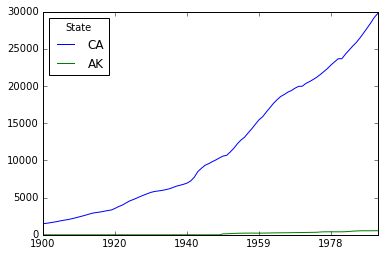

In [17]:
#Plot the populations of Alaska and California over time

df_trans=all_df.iloc[6:,:].transpose()
df_trans.loc[:,['CA','AK']].plot.line()


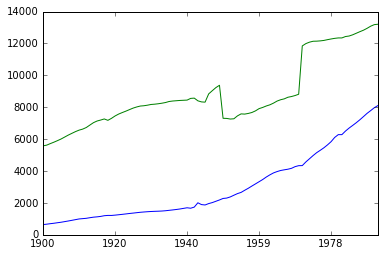

In [18]:
#Plot the population of New England and the Southwest over time. Don’t forget to label your axes. What state showed the greatest change in population?

southwest=df_trans.loc[:,['AZ', 'NM', 'NV', 'UT']].sum(axis=1).plot.line()
new_england=df_trans.loc[:,['CT','ME','MA','NH','RI','VT']].sum(axis=1).plot.line()

# Correction to Homework After Grading: Here is my answer for answer - What state showed the greatest change in population? 

The list below shows the differences in populationfrom 1900_1990

In [19]:
Pop_Diff_1900_1990 = all_df[1990]-all_df['1900']
Pop_Diff_1900_1990

State
U.S.           -76094.000
Northeast      -21059.000
Northcentral   -26359.000
South          -24565.000
West            -4112.000
0.0                 0.000
AL               2210.587
AR               1036.725
AZ               3541.228
CA              28270.021
CO               2751.394
CT               2377.116
DC                328.900
DE                481.168
FL              12407.926
GA               4258.216
IA                545.755
ID                843.749
IL               6602.602
IN               3026.159
KS               1004.574
KY               1537.296
LA               2835.973
MA               3228.425
MD               3592.468
ME                532.928
MI               6872.297
MN               2621.099
MO               2009.073
MS               1020.216
MT                554.065
NC               4731.637
ND                317.800
NE                511.385
NH                697.252
NJ               5846.188
NM               1319.069
NV               1158.833
NY    

In [20]:
Pop_Diff_1900_1990.max()

28270.021000000001

# The list below shows the five states with the highest change in population over the timeframe of 1900-1990

In [65]:
sorted_frame = Pop_Diff_1900_1990.to_frame().reset_index()
sorted_frame.columns=['State','Values']
sorted_frame = sorted_frame.sort_values(['Values'], ascending=False)
Print " The top 5 states with the most growth"
sorted_frame.head(5)

,State,Values
9,CA,28270.021
47,TX,13931.510
14,FL,12407.926
38,NY,10707.455
26,MI,6872.297


In [21]:
Most_Growth=Pop_Diff_1900_1990[Pop_Diff_1900_1990==28270.021000000001]
print "State with most growth is CA: ", Most_Growth

State with most growth is CA:  State
CA    28270.021
dtype: float64


# This shows a visual representation of the 5 states with the highest amount of population growth in a bar chart

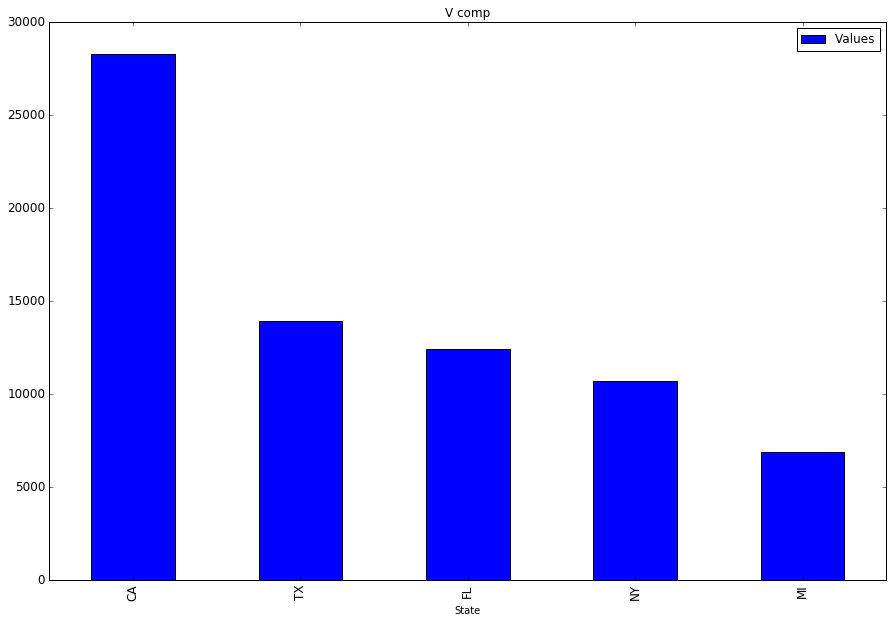

In [69]:
top_5=sorted_frame.head(5).set_index('State')
top_5.plot(kind='bar', title ="V comp",figsize=(15,10),legend=True, fontsize=12)
